In [1]:
# https://qiskit.org/documentation/tutorials/circuits/01_circuit_basics.html

import numpy as np
from qiskit import *

In [2]:
# 3개의 qubit으로 이루어진 양자 회로 생성
qcirc=QuantumCircuit(3)

In [3]:
# qubit 0에 H 게이트를 추가하여 qubit을 중첩
qcirc.h(0)

# Bell 상태로 만들기 위해 control qubit 0, target qubit 1에 CX 게이트 추가 후, putting
qcirc.cx(0, 1)

# GHZ 상태로 만들기 위해 control qubit 0, target qubit 2에 CX 게이트 추가 후, putting
qcirc.cx(0, 2)

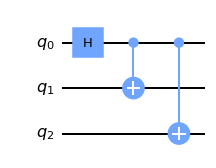

In [4]:
# 설계한 양자 회로 가시화
qcirc.draw()

In [5]:
from qiskit.quantum_info import Statevector

# 시뮬레이터의 초기 상태를 기저 상태로 설정
statev=Statevector.from_int(0, 2**3)

# 양자 회로에 의한 상태를 진화
statev=statev.evolve(qcirc)

# LaTeX로 가시화
statev.draw('latex')

<IPython.core.display.Latex object>

In [6]:
from qiskit.visualization import array_to_latex

# LaTeX로 가시화
array_to_latex(statev)

<IPython.core.display.Latex object>

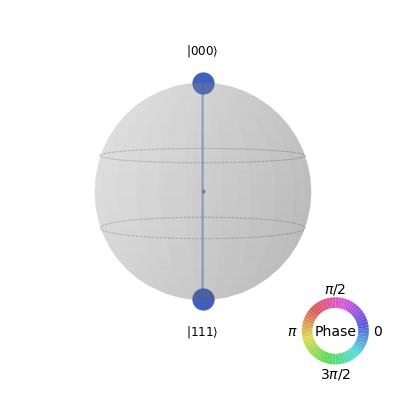

In [7]:
# qsphere로 가시화
statev.draw('qsphere')

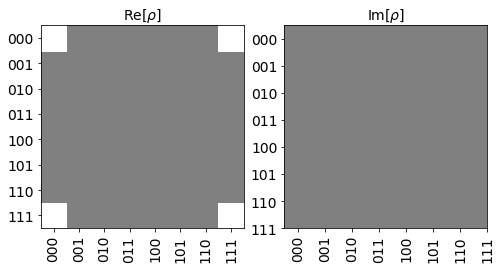

In [8]:
# 힌턴 다이어그램으로 가시화
statev.draw('hinton')

In [9]:
from qiskit.quantum_info import Operator

result=Operator(qcirc)
result.data

array([[ 0.70710678+0.j,  0.70710678+0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.70710678+0.j, -0.70710678+0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
         0.70710678+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.70710678+0.j, -0.70710678+0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.70710678+0.j,  0.70710678+0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
        -0.70710678+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.      

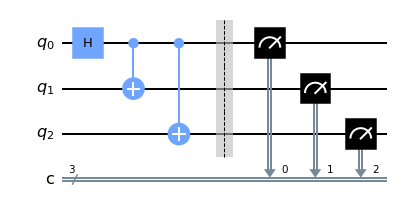

In [10]:
meas=QuantumCircuit(3, 3)
meas.barrier(range(3))
meas.measure(range(3), range(3))

qcirc=meas.compose(qcirc, range(3), front=True)
qcirc.draw()

In [11]:
from qiskit.providers.aer import QasmSimulator

bakend=QasmSimulator()
qc_complied=transpile(qcirc, bakend)
exe_sim=bakend.run(qc_complied, shots=1024)
result_sim=exe_sim.result()

In [12]:
cnt=result_sim.get_counts(qc_complied)
print(cnt)

{'000': 507, '111': 517}


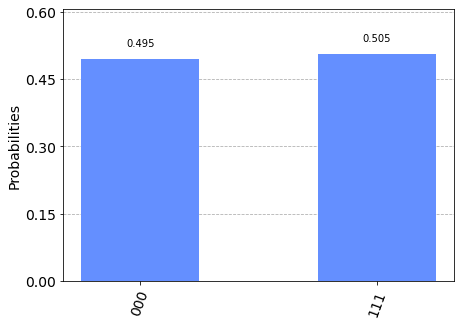

In [13]:
from qiskit.visualization import plot_histogram

plot_histogram(cnt)